In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns
from statistics import mode
import re
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV

# Load our warnings libraries
import warnings
warnings.filterwarnings('ignore')

# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# Any results you write to the current directory are saved as output.

/kaggle/input/titanic/train.csv
/kaggle/input/titanic/gender_submission.csv
/kaggle/input/titanic/test.csv


In [2]:
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler

In [3]:
train_data = pd.read_csv("/kaggle/input/titanic/train.csv", skipinitialspace=True)
train_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
test_data = pd.read_csv("/kaggle/input/titanic/test.csv", skipinitialspace=True)
test_data.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


# ![](http://)EDN (Exploratpry Data Analysis)

Let's take a look at the target variable = "Survived"

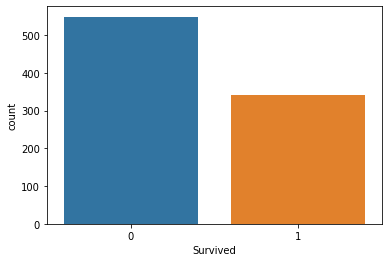

In [5]:
sns.countplot(train_data['Survived'])

We can see the results are in binary, so this is a classification problem.

# Looking at properties of all the features

In [6]:
train_data.columns.tolist()

['PassengerId',
 'Survived',
 'Pclass',
 'Name',
 'Sex',
 'Age',
 'SibSp',
 'Parch',
 'Ticket',
 'Fare',
 'Cabin',
 'Embarked']

So we have 10 features here to work with.

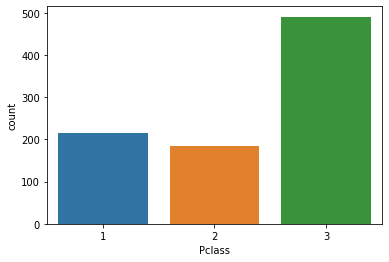

In [7]:
sns.countplot(train_data['Pclass'])

In [8]:
train_data.Name.value_counts()

Cacic, Mr. Luka                             1
Laitinen, Miss. Kristina Sofia              1
Harper, Rev. John                           1
Humblen, Mr. Adolf Mathias Nicolai Olsen    1
Hodges, Mr. Henry Price                     1
                                           ..
Woolner, Mr. Hugh                           1
Skoog, Master. Karl Thorsten                1
Smiljanic, Mr. Mile                         1
Staneff, Mr. Ivan                           1
Harris, Mr. George                          1
Name: Name, Length: 891, dtype: int64

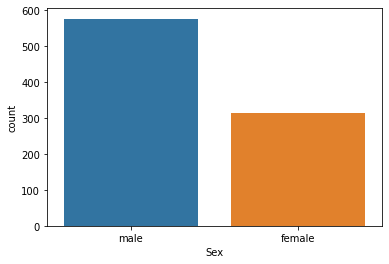

In [9]:
sns.countplot(train_data['Sex'])

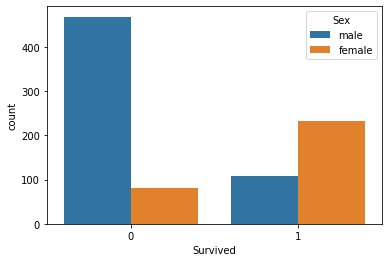

In [10]:
sns.countplot(x = 'Survived', hue = 'Sex', data = train_data)

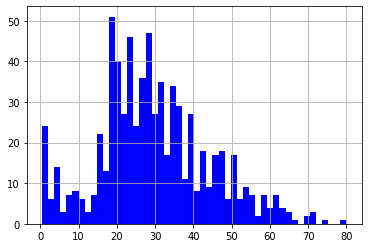

In [11]:
train_data['Age'].hist(bins = 50, color = 'blue')

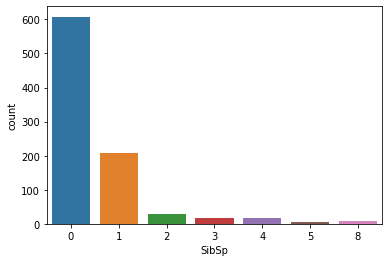

In [12]:
sns.countplot(train_data['SibSp'])

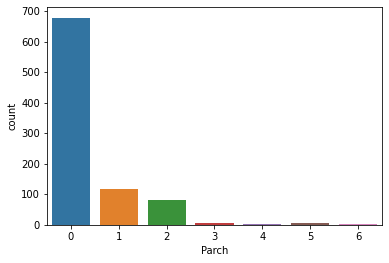

In [13]:
sns.countplot(train_data['Parch'])

In [14]:
train_data.Ticket.value_counts()

1601          7
CA. 2343      7
347082        7
CA 2144       6
3101295       6
             ..
113050        1
112379        1
5727          1
F.C. 12750    1
330958        1
Name: Ticket, Length: 681, dtype: int64

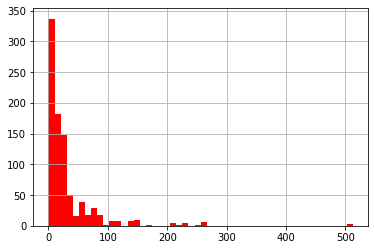

In [15]:
train_data['Fare'].hist(bins = 50, color = 'red')

In [16]:
train_data.Cabin.value_counts()

B96 B98        4
C23 C25 C27    4
G6             4
F2             3
F33            3
              ..
E12            1
B39            1
C99            1
D15            1
A6             1
Name: Cabin, Length: 147, dtype: int64

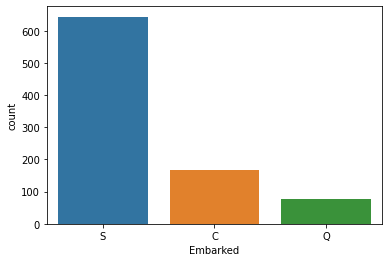

In [17]:
sns.countplot(train_data['Embarked'])

# # # Explore patterns in the data

In [18]:
#Merge the two files into one
test_data['Survived'] = np.nan #The survived column in test data doesn't exist at the moment in the competition

full_data = pd.concat([train_data, test_data], sort=False).reset_index()

full_data.head()

,index,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,0,1,0.0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,1,2,1.0,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,2,3,1.0,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,3,4,1.0,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,4,5,0.0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [19]:
full_data.shape

(1309, 13)

In [20]:
#Look at what null values we have
full_data.isnull().sum().sort_values(ascending = False)

Cabin          1014
Survived        418
Age             263
Embarked          2
Fare              1
Ticket            0
Parch             0
SibSp             0
Sex               0
Name              0
Pclass            0
PassengerId       0
index             0
dtype: int64

In [21]:
# Let's find the percentages of null values, even more informative!
full_data.isnull().mean().sort_values(ascending = False)

Cabin          0.774637
Survived       0.319328
Age            0.200917
Embarked       0.001528
Fare           0.000764
Ticket         0.000000
Parch          0.000000
SibSp          0.000000
Sex            0.000000
Name           0.000000
Pclass         0.000000
PassengerId    0.000000
index          0.000000
dtype: float64

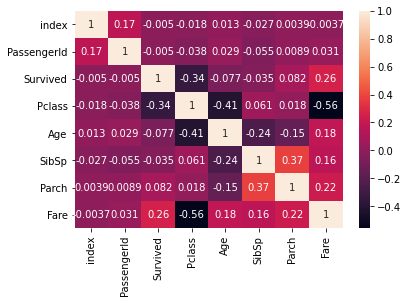

In [22]:
#Create a correlation matrix to show us the correlation coefficients between features to see which features have most impact 
#on each other and allow us to compute the missing values for the features above.

sns.heatmap(full_data.corr(), annot = True)

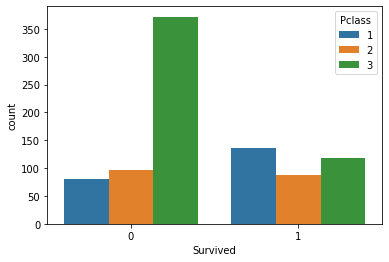

In [23]:
#We need to compute values for 263 missing ages. From the matrix above, we can see Pclass has the highest correlation with Age.
#Lets take a closer look at how Pclass affects survival.

sns.countplot(x = 'Survived', hue = 'Pclass', data = train_data)

In [24]:
#Now we're going to use Pclass to compute the missing values for Age. We will find the average ages for each class.

age_group = full_data.groupby("Pclass")["Age"]

print(age_group.median())

Pclass
1    39.0
2    29.0
3    24.0
Name: Age, dtype: float64


In [25]:
#Now we will fill the nan values with these average ages.
full_data['Age'] = full_data.groupby("Pclass")['Age'].transform(lambda x: x.fillna(x.median()))

#Check if all null values have been taken care of.
full_data["Age"].isnull().sum()

0

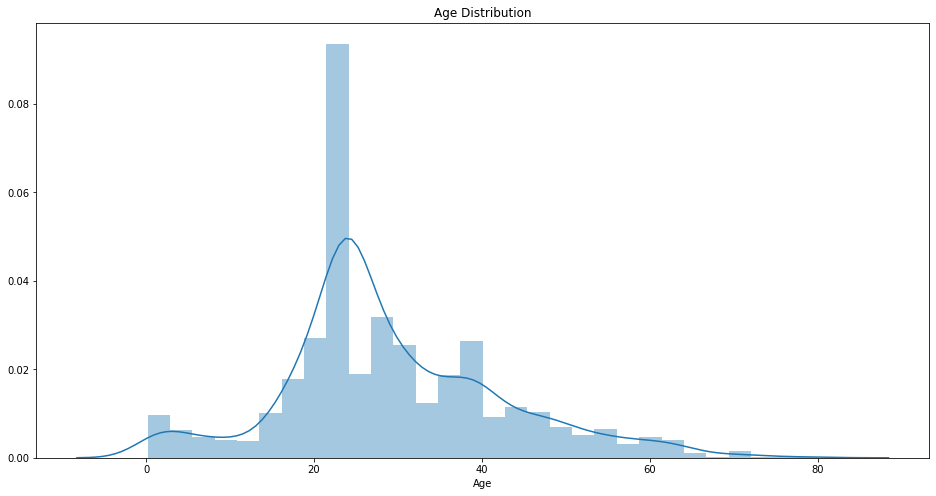

In [26]:
#Now lets explore the age distibution with the missing values filled in
plt.figure(figsize = (16, 8))

sns.distplot(full_data["Age"])
plt.title("Age Distribution")
plt.xlabel("Age")
plt.show()

In [27]:
#Missing values for Embarkment (2 missing values) by imputing the mode

full_data["Embarked"] = full_data["Embarked"].fillna(value='S', inplace=True)

full_data.head()

,index,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,0,1,0.0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,None
1,1,2,1.0,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,None
2,2,3,1.0,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,None
3,3,4,1.0,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,None
4,4,5,0.0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,None


In [28]:
#Fill in other nan value for fare. Looking at the correlation matrix, plass again has highest influence so will use it to impute
full_data['Fare'] = full_data.groupby("Pclass")['Fare'].transform(lambda x: x.fillna(x.median()))


In [29]:
#For cabin, there are too many nans to find a mode, so we will add U for Undefined
full_data['Cabin'] = full_data['Cabin'].fillna('U')

In [30]:
#Update Sex column and Embarked to be numerical in both data sets

full_data["Sex"] = full_data["Sex"].map({"male": "0", "female":"1"})

full_data["Embarked"] = full_data["Embarked"].map({"S": "0", "C":"1", "Q":"2"})

#Check it's worked

full_data.head()

,index,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,0,1,0.0,3,"Braund, Mr. Owen Harris",0,22.0,1,0,A/5 21171,7.2500,U,NaN
1,1,2,1.0,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,38.0,1,0,PC 17599,71.2833,C85,NaN
2,2,3,1.0,3,"Heikkinen, Miss. Laina",1,26.0,0,0,STON/O2. 3101282,7.9250,U,NaN
3,3,4,1.0,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,35.0,1,0,113803,53.1000,C123,NaN
4,4,5,0.0,3,"Allen, Mr. William Henry",0,35.0,0,0,373450,8.0500,U,NaN


In [31]:
#Create class columns out of the Pclass column.
full_data['First Class'] = full_data['Pclass'].apply(lambda x: 1 if x==1 else 0)

full_data['Second Class'] = full_data['Pclass'].apply(lambda x: 1 if x==2 else 0)

full_data['Third Class'] = full_data['Pclass'].apply(lambda x: 1 if x==3 else 0)

full_data.head()

,index,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,First Class,Second Class,Third Class
0,0,1,0.0,3,"Braund, Mr. Owen Harris",0,22.0,1,0,A/5 21171,7.2500,U,NaN,0,0,1
1,1,2,1.0,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,38.0,1,0,PC 17599,71.2833,C85,NaN,1,0,0
2,2,3,1.0,3,"Heikkinen, Miss. Laina",1,26.0,0,0,STON/O2. 3101282,7.9250,U,NaN,0,0,1
3,3,4,1.0,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,35.0,1,0,113803,53.1000,C123,NaN,1,0,0
4,4,5,0.0,3,"Allen, Mr. William Henry",0,35.0,0,0,373450,8.0500,U,NaN,0,0,1


In [32]:
#Turn 'Name' column into something more useful. Let's isolate the salutations

full_data['Title'] = full_data['Name'].str.extract(' ([A-Za-z]+)\.', expand = False)
full_data['Title'].unique()

array(['Mr', 'Mrs', 'Miss', 'Master', 'Don', 'Rev', 'Dr', 'Mme', 'Ms',
       'Major', 'Lady', 'Sir', 'Mlle', 'Col', 'Capt', 'Countess',
       'Jonkheer', 'Dona'], dtype=object)

In [33]:
#Now let's see a percentage breakdown of how many of each title is included
full_data['Title'].value_counts(normalize = True) * 100

Mr          57.830405
Miss        19.862490
Mrs         15.049656
Master       4.660046
Rev          0.611154
Dr           0.611154
Col          0.305577
Mlle         0.152788
Major        0.152788
Ms           0.152788
Jonkheer     0.076394
Countess     0.076394
Dona         0.076394
Sir          0.076394
Mme          0.076394
Capt         0.076394
Lady         0.076394
Don          0.076394
Name: Title, dtype: float64

In [34]:
#As quite a large number of these titles are of a very minut percentage, it might help to join these all into one overall title
full_data['Title'] = full_data['Title'].replace(['Rev', 'Dr', 'Col', 'Ms', 'Mlle', 'Major', 'Countess', 'Capt', 'Dona', 'Jonkheer', 
                                                 'Lady', 'Sir', 'Mme', 'Don'], 'Other')

full_data['Title'].value_counts(normalize = True) * 100

Mr        57.830405
Miss      19.862490
Mrs       15.049656
Master     4.660046
Other      2.597403
Name: Title, dtype: float64

In [35]:
#Now lets convert the Titles to numerical data
full_data["Title"] = full_data["Title"].map({"Mr": "0", "Miss": "1","Mrs":"2", "Master":"3", "Other":"4"})

full_data.head()

,index,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,First Class,Second Class,Third Class,Title
0,0,1,0.0,3,"Braund, Mr. Owen Harris",0,22.0,1,0,A/5 21171,7.2500,U,NaN,0,0,1,0
1,1,2,1.0,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,38.0,1,0,PC 17599,71.2833,C85,NaN,1,0,0,2
2,2,3,1.0,3,"Heikkinen, Miss. Laina",1,26.0,0,0,STON/O2. 3101282,7.9250,U,NaN,0,0,1,1
3,3,4,1.0,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,35.0,1,0,113803,53.1000,C123,NaN,1,0,0,2
4,4,5,0.0,3,"Allen, Mr. William Henry",0,35.0,0,0,373450,8.0500,U,NaN,0,0,1,0


In [36]:
#Lets make our "Cabin" feature more useful
full_data['Cabin_Letter'] = full_data.Cabin.str[0]
full_data.head()

,index,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,First Class,Second Class,Third Class,Title,Cabin_Letter
0,0,1,0.0,3,"Braund, Mr. Owen Harris",0,22.0,1,0,A/5 21171,7.2500,U,NaN,0,0,1,0,U
1,1,2,1.0,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,38.0,1,0,PC 17599,71.2833,C85,NaN,1,0,0,2,C
2,2,3,1.0,3,"Heikkinen, Miss. Laina",1,26.0,0,0,STON/O2. 3101282,7.9250,U,NaN,0,0,1,1,U
3,3,4,1.0,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,35.0,1,0,113803,53.1000,C123,NaN,1,0,0,2,C
4,4,5,0.0,3,"Allen, Mr. William Henry",0,35.0,0,0,373450,8.0500,U,NaN,0,0,1,0,U


In [37]:
#Turn the cabin letter into numerical data
cabin_category = {'A':1, 'B':2, 'C':3, 'D':4, 'E':5, 'F':6, 'G':7, 'T':8, 'U':9}
full_data['Cabin_Letter'] = full_data['Cabin_Letter'].map(cabin_category)
full_data['Cabin_Letter'].unique().tolist()

[9, 3, 5, 7, 4, 1, 2, 6, 8]

In [38]:
#Create 'familySize' feature
full_data['FamilySize'] = full_data['SibSp'] + full_data['Parch'] + 1

In [39]:
# Drop redundant features
#For now drop the 'Embarked' feature as we can't get it to work with nan
full_data = full_data.drop(['Name', 'Pclass', 'SibSp', 'Parch', 'Ticket', 'Cabin', 'Embarked'], axis = 1)
full_data.head()

,index,PassengerId,Survived,Sex,Age,Fare,First Class,Second Class,Third Class,Title,Cabin_Letter,FamilySize
0,0,1,0.0,0,22.0,7.2500,0,0,1,0,9,2
1,1,2,1.0,1,38.0,71.2833,1,0,0,2,3,2
2,2,3,1.0,1,26.0,7.9250,0,0,1,1,9,1
3,3,4,1.0,1,35.0,53.1000,1,0,0,2,3,2
4,4,5,0.0,0,35.0,8.0500,0,0,1,0,9,1


In [40]:
#Now we have sorted trhough all our data, time to turn the data back into our train and test sets
test = full_data[full_data['Survived'].isna()].drop(['Survived'], axis = 1)
test.head()

,index,PassengerId,Sex,Age,Fare,First Class,Second Class,Third Class,Title,Cabin_Letter,FamilySize
891,0,892,0,34.5,7.8292,0,0,1,0,9,1
892,1,893,1,47.0,7.0000,0,0,1,2,9,2
893,2,894,0,62.0,9.6875,0,1,0,0,9,1
894,3,895,0,27.0,8.6625,0,0,1,0,9,1
895,4,896,1,22.0,12.2875,0,0,1,2,9,3


In [41]:
train = full_data[full_data['Survived'].notna()]
train.head()

,index,PassengerId,Survived,Sex,Age,Fare,First Class,Second Class,Third Class,Title,Cabin_Letter,FamilySize
0,0,1,0.0,0,22.0,7.2500,0,0,1,0,9,2
1,1,2,1.0,1,38.0,71.2833,1,0,0,2,3,2
2,2,3,1.0,1,26.0,7.9250,0,0,1,1,9,1
3,3,4,1.0,1,35.0,53.1000,1,0,0,2,3,2
4,4,5,0.0,0,35.0,8.0500,0,0,1,0,9,1


In [42]:
#'Survived'  is a float, so we need to turn back to an integer
train['Survived'] = train['Survived'].astype(np.int8)

In [43]:
#Intro to local validation
features = train.drop(['Survived', 'PassengerId'], axis = 1)
labels = train['Survived']
X_train, X_test, y_train, y_test = train_test_split(features, labels, test_size = 0.2, random_state = 2)

#Create and fit logistic regression model
model = LogisticRegression(max_iter = 10000)
model.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=10000,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [44]:
model.score(features, labels)

0.8260381593714927

In [45]:
predictions = model.predict(X_test)
predictions

array([0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1,
       0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0,
       1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0,
       0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0,
       1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0,
       0, 0, 1], dtype=int8)

Testing Accuracy

In [46]:
#Find the confusion matrix ([[TP, FP], [TN, FN]])
confusion_matrix(y_test, predictions)

array([[87, 13],
       [24, 55]])

In [47]:
#Calculate accuracy from above
accuracy = (87 + 55) / (87 + 13 + 24 + 55)
accuracy

0.7932960893854749

In [48]:
print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

           0       0.78      0.87      0.82       100
           1       0.81      0.70      0.75        79

    accuracy                           0.79       179
   macro avg       0.80      0.78      0.79       179
weighted avg       0.79      0.79      0.79       179



In [49]:
accuracy_score(y_test, predictions)

0.7932960893854749

Cross Validation

In [50]:
# Set our robust cross-validation scheme!
kf = KFold(n_splits = 5, random_state = 2)

# Print our CV accuracy estimate:
cross_val_score(model, X_test, y_test, cv = kf).mean()

0.781904761904762

Hyperparamter tuning

Below we set the hyperparameter grid of values with 4 lists of values:

'criterion' : A function which measures the quality of a split.
'n_estimators': The number of trees of our random forest.
'max_features': The number of features to choose when looking for the best way of splitting.
'max_depth' : the maximum depth of a decision tree.

In [51]:
#Set parameter grid
grid_search = { 'criterion': ['gini', 'entropy'],
    'n_estimators': [100, 300, 500],
    'max_features': ['auto', 'log2'],
    'max_depth' : [3, 5, 7]  }

#Create classifier
RandomForest = RandomForestClassifier()

#Grid search
RandomForestCV = GridSearchCV(estimator = RandomForest, param_grid = grid_search, cv=4)

#Fit model
RandomForestCV.fit(X_train, y_train)

#Insert these best hyperparameter values into our Random Forest Classifier and predict!
predictionCV = RandomForestCV.best_estimator_.predict(X_test)

confusion_matrix(y_test, predictionCV)

array([[89, 11],
       [26, 53]])

In [52]:
#Check accuracy
accuracy_score(y_test, predictionCV)

0.7932960893854749

In [53]:
#Find the best hyperparameters
RandomForestCV.best_params_

{'criterion': 'gini',
 'max_depth': 5,
 'max_features': 'log2',
 'n_estimators': 100}

In [54]:
# Predict!
test['Survived'] = RandomForestCV.predict(test.drop(['PassengerId'], axis = 1))

In [55]:
# Write test predictions for final submission
test[['PassengerId', 'Survived']].to_csv('my_submission.csv', index = False)